In [42]:
# Libary Imports
import pandas as pd
import numpy as np
from scipy.stats import norm,t 
import matplotlib.pyplot as plt

# Local Import
from utility import VAR,CVAR, load_data

In [43]:
# Load Data
df = load_data('DASH_merged.txt')
df.head()

,positive_score_en,negative_score_en,score_en,positive_volume_en,negative_volume_en,volume_ratio_en,total_volume_en,total_volume_non_en,total_volume_global,close,high,low,open,volumefrom,volumeto,logclose,loghigh,loglow,logopen,fluctuation
time,,,,,,,,,,,,,,,,,,,,
2018-01-02 11:00:00,2.040000,1.339500,0.700500,3,1,3.0000,48,3,51,1092.99,1098.78,1089.73,1097.59,973.44,1063595.19,6.996672,7.001956,6.993685,7.000872,-0.004200
2018-01-02 12:00:00,1.750175,1.512967,0.237208,16,3,5.3333,212,30,242,1089.11,1099.60,1085.70,1092.99,465.27,509020.53,6.993116,7.002702,6.989980,6.996672,-0.003556
2018-01-02 13:00:00,1.901171,1.776850,0.124321,38,6,6.3333,226,33,259,1113.63,1115.54,1089.19,1089.28,1576.62,1740882.55,7.015380,7.017094,6.993190,6.993272,0.022108
2018-01-02 14:00:00,2.065209,1.442150,0.623059,32,4,8.0000,255,17,272,1104.40,1117.30,1102.59,1113.25,883.14,980074.94,7.007057,7.018670,7.005417,7.015039,-0.007981
2018-01-02 15:00:00,1.757532,1.685425,0.072107,34,4,8.5000,247,17,264,1100.28,1107.73,1090.27,1104.89,640.29,704188.97,7.003320,7.010068,6.994181,7.007501,-0.004181


In [44]:
# Log Returns
r = df['close'].pct_change().dropna()

# Aggregate log returns
# r = r.resample('D').sum()

# Plotting: VaR & CVaR

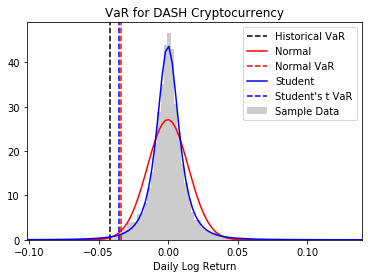

In [45]:
# Significance Level
alpha = 0.01

# Defining Grid
nbins = 100
minv = np.min(r)
maxv = np.max(r)
x = np.linspace(minv,maxv,nbins)

# Initialize figure
fig, ax = plt.subplots()
ax.set(xlim=[minv,maxv], xlabel='Daily Log Return' )
ax.set_title("VaR for DASH Cryptocurrency")

# Fit Empirical Distribution and compute non-parametric VaR & CVaR
grey = .80, .80, .80
ax.hist(r,nbins,density=True,label='Sample Data',color=grey)

VaR_Historical = VAR(r,alpha)
CVaR_Historical = CVAR(r,alpha)
ax.axvline(-VaR_Historical,color='k', linestyle='--',label='Historical VaR')

# Fit Normal Distribution and compute parametric VaR & CVaR
mu, sigma = norm.fit(r)

VaR_Normal = mu + sigma*norm.ppf(1-alpha)
CVaR_Normal = mu+sigma*norm.pdf(norm.ppf(0.05))/0.05

ax.plot(x,norm.pdf(x,loc = mu, scale = sigma),'r',label ='Normal')
ax.axvline(-VaR_Normal,color='r', linestyle='--',label='Normal VaR')

# Fit Student's t-Distribution and compute VaR & CVaR
df, loc, scale  = t.fit(r)

sigma_t = np.sqrt((df-2)/df) * sigma
VaR_Student = mu + sigma_t * t.ppf(1-alpha,df)
xanu = t.ppf(alpha, df) 
CVaR_Student = mu + sigma * -1/alpha * (1-df)**(-1) * (df-2+xanu**2) * t.pdf(xanu, df)

ax.plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'b',label ='Student')
ax.axvline(-VaR_Student, color='b', linestyle='--', label="Student's t VaR")

ax.legend()

In [46]:
print(f"Historical VaR    = {VaR_Historical:.4f}")
print(f"Historical CVaR    = {CVaR_Historical:.4f}")
print(f"Student's t-VaR = {VaR_Student:.4f}")
print(f"Student's t-CVaR = {CVaR_Student:.4f}")
print(f"Normal VaR    = {VaR_Normal:.4f}")
print(f"Normal CVaR    = {CVaR_Normal:.4f}")
# http://www.quantatrisk.com/2015/12/02/student-t-distributed-linear-value-at-risk/ 
# http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/

Historical VaR    = 0.0414
Historical CVaR    = 0.0539
Student's t-VaR = 0.0351
Student's t-CVaR = 0.1239
Normal VaR    = 0.0340
Normal CVaR    = 0.0301
